<a id="1"></a>
# <p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">TITANIC_CLASSIFICATION</p>

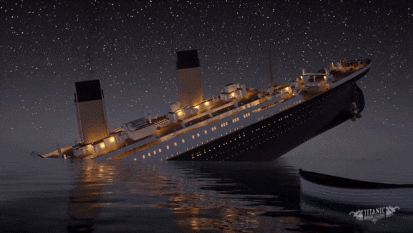

<a id="1"></a>  
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [2]:
Train=pd.read_csv(r'Train.csv')
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Test=pd.read_csv(r'Test.csv')
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<div style="background-color:#edeff1; padding:20px; font-size:15px">
    <strong>Data Dictionary:</strong> 
    <br>



* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
combine = [Train,Test]

In [9]:
print(Train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [10]:
print(Test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [11]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
Train_num = Train.select_dtypes(["int64", "float64"])
Train_cat = Train.select_dtypes(object)

In [18]:
Train_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [19]:
Train_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>

In [23]:
def Barchart(char):
    Survive=Train[Train['Survived']==1][char].value_counts()
    Dead=Train[Train['Survived']==0][char].value_counts()
    df1=pd.DataFrame([Survive,Dead])
    df1.index=['Survived','Dead']
    df1.plot(kind='bar',stacked=True,figsize=(6,4))

In [21]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived: 
 Sex
female    233
male      109
Name: count, dtype: int64
Dead: 
 Sex
male      468
female     81
Name: count, dtype: int64


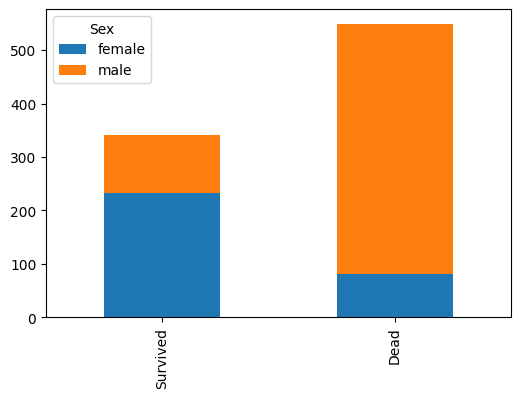

In [24]:
Barchart('Sex')
print('Survived: \n', Train[Train['Survived']==1]['Sex'].value_counts())
print('Dead: \n', Train[Train['Survived']==0]['Sex'].value_counts())

Survived: 
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead: 
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


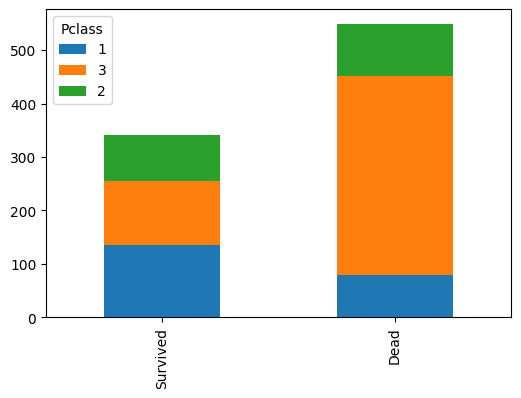

In [25]:
Barchart('Pclass')
print('Survived: \n', Train[Train['Survived']==1]['Pclass'].value_counts())
print('Dead: \n', Train[Train['Survived']==0]['Pclass'].value_counts())

Survived: 
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead: 
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


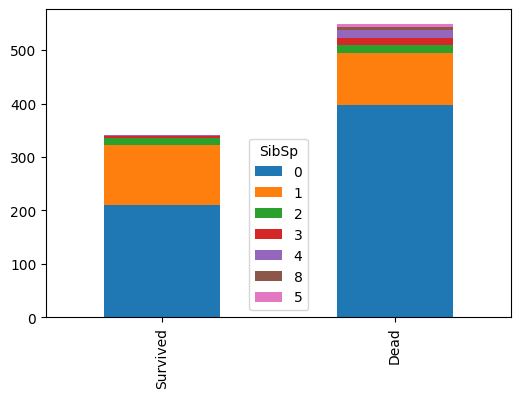

In [26]:
Barchart('SibSp')
print('Survived: \n', Train[Train['Survived']==1]['SibSp'].value_counts())
print('Dead: \n', Train[Train['Survived']==0]['SibSp'].value_counts())

Survived: 
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead: 
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


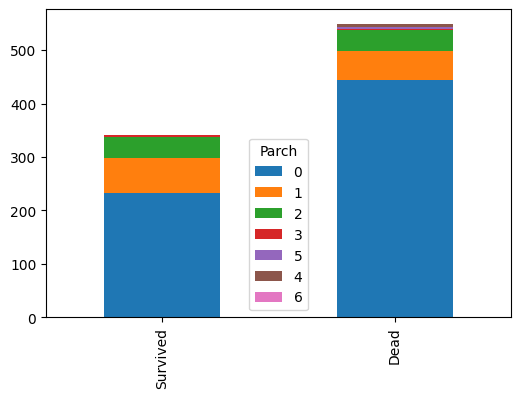

In [27]:
Barchart('Parch')
print('Survived: \n', Train[Train['Survived']==1]['Parch'].value_counts())
print('Dead: \n', Train[Train['Survived']==0]['Parch'].value_counts())

Survived: 
 Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead: 
 Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


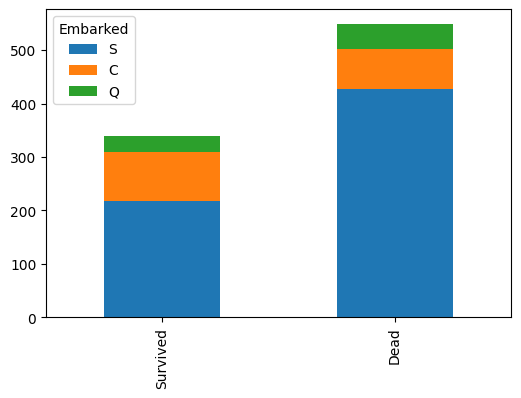

In [28]:
Barchart('Embarked')
print('Survived: \n', Train[Train['Survived']==1]['Embarked'].value_counts())
print('Dead: \n', Train[Train['Survived']==0]['Embarked'].value_counts())

# Feature Engineering

In [29]:
for Dataset in combine:
    Dataset['Title']=Dataset.Name.str.extract(' ([A-Za-z]+)\.')
pd.crosstab(Train['Title'], Train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
Train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [31]:
Train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

# Title Mapping

In [32]:
for Dataset in combine:
    Dataset['Title']=Dataset['Title'].replace(['Master','Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady',\
                                             'Mme','Don','Jonkheer'],'Other')
Train['Title'].value_counts()

Title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64

In [33]:
Title_map={'Mr':1,'Miss':2,'Mrs':3,'Other':4}
for Dataset in combine:
    Dataset['Title'] = Dataset["Title"].map(Title_map)

In [34]:
Dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0


In [35]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


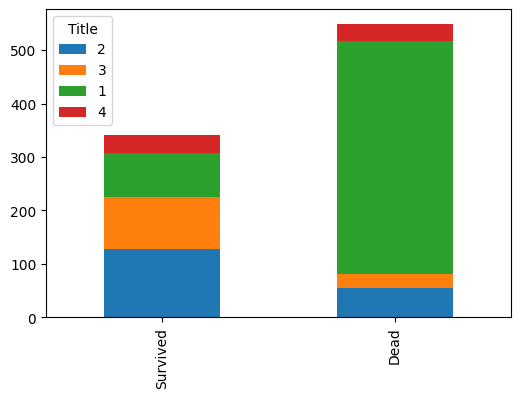

In [37]:
Barchart('Title')

In [38]:
Sex_map={'male':0,'female':1}
for Dataset in combine:
    Dataset['Sex'] = Dataset['Sex'].map(Sex_map)

In [39]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


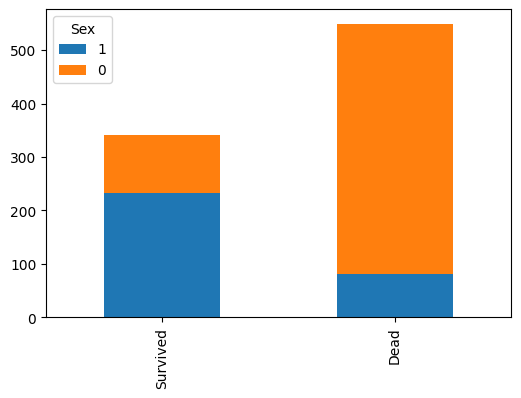

In [40]:
Barchart('Sex')

In [41]:
# delete unnecessary feature from dataset
Train.drop('Name', axis=1, inplace=True)
Test.drop('Name', axis=1, inplace=True)

In [42]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,3.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,3.0


In [43]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [44]:
Train["Age"].fillna(Train.groupby("Title")["Age"].transform("median"), inplace= True)
Test["Age"].fillna(Test.groupby('Title')['Age'].transform("median"), inplace= True)

In [45]:
Train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,3


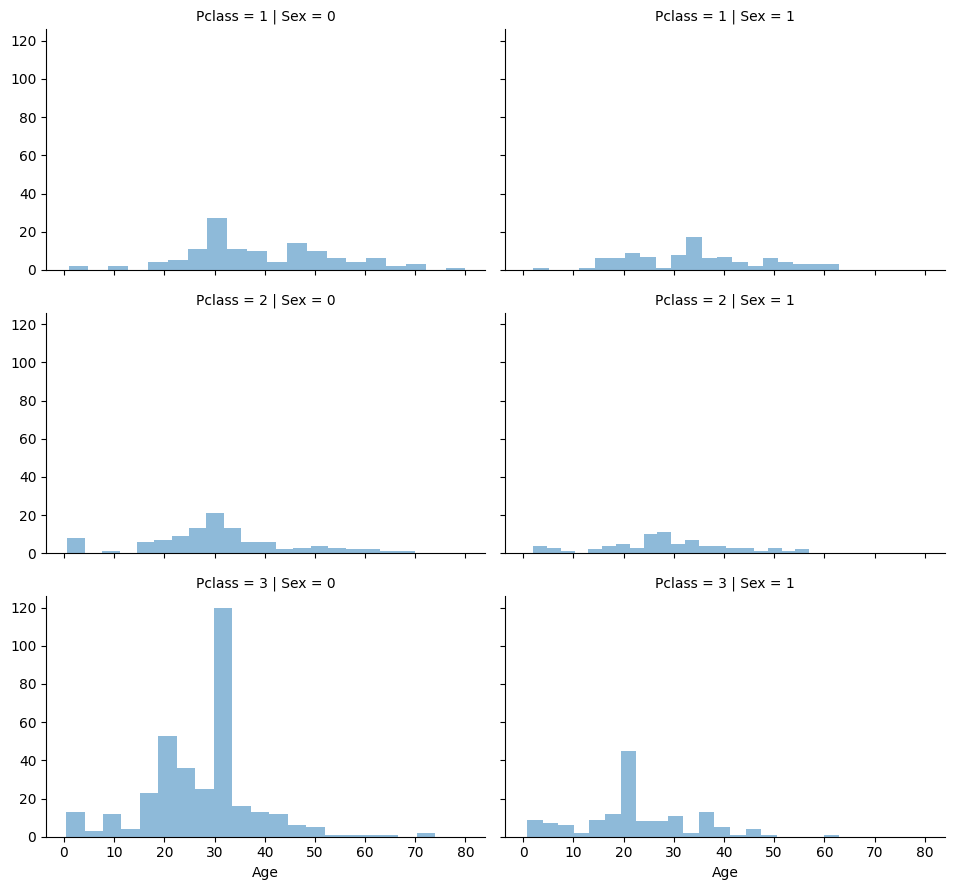

In [46]:
grid = sns.FacetGrid(Train, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [47]:
Train['AgeBand'] = pd.cut(Train['Age'], 5)
Train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.542857
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [48]:
for Dataset in combine:
    Dataset.loc[Dataset['Age']<=16, 'Age']=0
    Dataset.loc[(Dataset['Age']>16) & (Dataset['Age']<=32), 'Age']=1
    Dataset.loc[(Dataset['Age']>32) & (Dataset['Age']<=48), 'Age']=2
    Dataset.loc[Dataset['Age']>48, 'Age']=3
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]"
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]"
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]"
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


In [49]:
Train = Train.drop(['AgeBand'], axis=1)
combine = [Train, Test]
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1


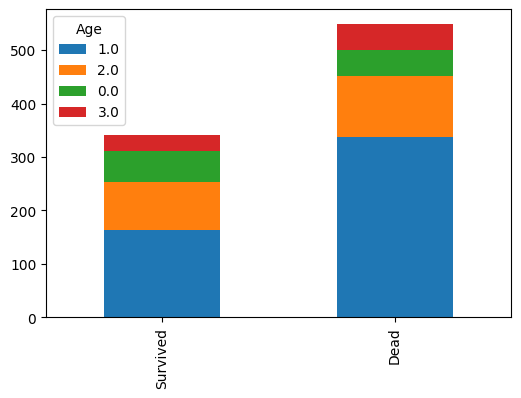

In [50]:
Train.head()
Barchart('Age')

In [51]:
for Dataset in combine:
    Dataset['Embarked'] = Dataset['Embarked'].fillna('S')

In [52]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1


In [53]:
for Dataset in combine:
    Dataset['Embarked'] = Dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
Train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,1
5,6,0,3,0,1.0,0,0,330877,8.4583,NaN,2,1
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,1
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,0,3
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,3


In [54]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
Train[['Family']].groupby(['Family']).value_counts()

Family
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

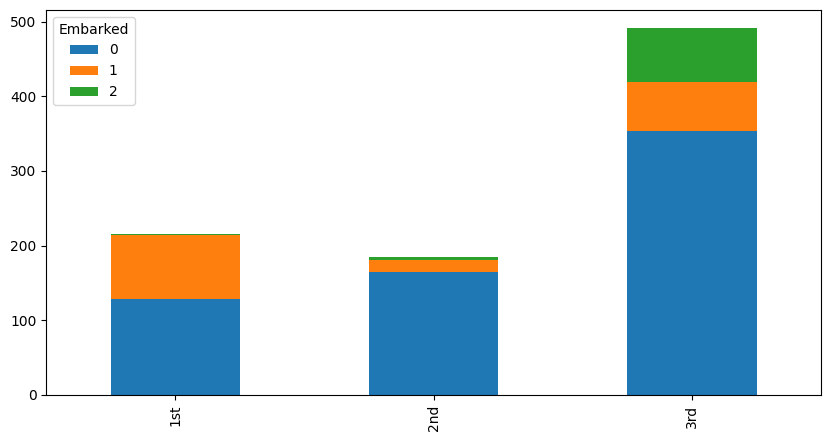

Pclass1:
 Embarked
0    129
1     85
2      2
Name: count, dtype: int64
Pclass2:
 Embarked
0    164
1     17
2      3
Name: count, dtype: int64
Pclass3:
 Embarked
0    353
2     72
1     66
Name: count, dtype: int64


In [55]:
Pclass1st = Train[Train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2nd = Train[Train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3rd = Train[Train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1st,Pclass2nd,Pclass3rd])
df.index = ['1st','2nd','3rd']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1st)
print("Pclass2:\n",Pclass2nd)
print("Pclass3:\n",Pclass3rd)

In [56]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,1,2
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,3,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,3,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,1,1


In [57]:
Train["Fare"].fillna(Train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
Test["Fare"].fillna(Test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [58]:
Train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,1,2
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,3,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,3,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,1,1


In [59]:
Train.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
886,887,0,2,0,1.0,0,0,211536,13.00,NaN,0,4,1
887,888,1,1,1,1.0,0,0,112053,30.00,B42,0,2,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.45,NaN,0,2,4
889,890,1,1,0,1.0,0,0,111369,30.00,C148,1,1,1
890,891,0,3,0,1.0,0,0,370376,7.75,NaN,2,1,1


In [60]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 90.6+ KB


In [61]:
for Dataset in combine:
    Dataset.loc[Dataset['Fare'] <= 17, 'Fare'] = 0
    Dataset.loc[(Dataset['Fare'] > 17) & (Dataset['Fare'] <= 30), 'Fare'] = 1
    Dataset.loc[(Dataset['Fare'] > 30) & (Dataset['Fare'] <= 80), 'Fare']   = 2
    Dataset.loc[Dataset['Fare'] > 80, 'Fare'] = 3
    Dataset['Fare'] = Dataset['Fare'].astype(int)

In [62]:
Train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,1.0,1,0,A/5 21171,0,NaN,0,1,2
1,2,1,1,1,2.0,1,0,PC 17599,2,C85,1,3,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0,NaN,0,2,1
3,4,1,1,1,2.0,1,0,113803,2,C123,0,3,2
4,5,0,3,0,2.0,0,0,373450,0,NaN,0,1,1


In [63]:
Train["Title"].fillna(Train.groupby("Pclass")["Title"].transform("median"), inplace=True)
Test["Title"].fillna(Test.groupby("Pclass")["Title"].transform("median"), inplace=True)

In [64]:
Train.shape,Test.shape

((891, 13), (418, 12))

In [65]:
Train = Train.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
Test = Test.drop(['Ticket', 'Cabin'], axis=1)

In [66]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    int32  
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
 9   Family    891 non-null    int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 66.3 KB


In [67]:
Train.shape,Test.shape

((891, 10), (418, 10))

In [68]:
Test.head(420)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,892,3,0,2.0,0,0,0,2,1.0,1
1,893,3,1,2.0,1,0,0,0,3.0,2
2,894,2,0,3.0,0,0,0,2,1.0,1
3,895,3,0,1.0,0,0,0,0,1.0,1
4,896,3,1,1.0,1,1,0,0,3.0,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,0,0,0,0,1.0,1
414,1306,1,1,2.0,0,0,3,1,2.0,1
415,1307,3,0,2.0,0,0,0,0,1.0,1
416,1308,3,0,1.0,0,0,0,0,1.0,1


In [69]:
Train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.291807,0.523008,0.381594,0.789001,0.361392,1.710438,1.904602
std,0.486592,0.836071,0.477990,0.789062,1.102743,0.806057,1.012468,0.635673,0.968778,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,3.000000,8.000000,6.000000,3.000000,2.000000,4.000000,11.000000


<a id="1"></a>
# <p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p>

In [70]:
Train.Family.value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [71]:
X_train = Train.drop("Survived", axis=1)
Y_train = Train["Survived"]
X_test  = Test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤLogisticRegressionㅤ</span> 

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

dfCoe = pd.DataFrame(Train.columns.delete(0))
dfCoe.columns = ['Feature']
dfCoe["Correlation"] = pd.Series(logreg.coef_[0])

dfCoe.sort_values(by='Correlation', ascending=False)

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;"> KNN </span> 

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.52

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;"> SVC </span> 

In [75]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;"> DecisionTreeClassifier </span>  

In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, Y_train) * 100, 2)
acc_dtc

89.0

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;"> RandomForest </span>   

In [77]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, Y_train)
Y_pred = Random_Forest.predict(X_test)
acc_Random_Forest = round(Random_Forest.score(X_train, Y_train) * 100, 2)
acc_Random_Forest

89.0

<left> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;"> Naive Bayes classifiers </span>   

In [78]:
gaussian  = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [79]:
Frame = pd.DataFrame({
    'Label': ['Support Vector Machines', 'KNN', 'Logistic Regression','DecisionTreeClassifier', 'RandomForest','Naive Bayes classifiers'],
    'Score': [acc_svc, acc_knn, acc_log, acc_dtc, acc_Random_Forest, acc_gaussian]})
Frame.sort_values(by='Score', ascending=False)

,Label,Score
3,DecisionTreeClassifier,89.00
4,RandomForest,89.00
1,KNN,85.52
0,Support Vector Machines,83.28
2,Logistic Regression,81.26
5,Naive Bayes classifiers,78.79


# Conculsion: - The order of the ✅Best Models from top to bottom:  Decision Tree